<a href="https://colab.research.google.com/github/gustafarsoares23/Tech-Challenge-ML/blob/main/Tech_Challengfe_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo valores do IBOVESPA com algoritmos de machine learning**

O objetivo deste estudo √© conduzir quatro tipos de testes de previs√£o de s√©ries temporais!

Utilizaremos dois modelos tradicionais (m√©dia m√≥vel e ARIMA), e tamb√©m um modelo mais robusto (Prophet do Facebook - Meta)

## **Sobre o dataset**

O dataset √© composto pelo hist√≥rico do valor das a√ß√µes do *IBOVESPA* dentro do per√≠odo de 01/01/2014 a 25/01/2024.

O Ibovespa √© o principal indicador de desempenho das a√ß√µes negociadas na B3 e re√∫ne as empresas mais importantes do mercado de capitais brasileiro. Foi criado em 1968 e, ao longo desses 50 anos, consolidou-se como refer√™ncia para investidores ao redor do mundo.

Reavaliado a cada quatro meses, o √≠ndice √© resultado de uma carteira te√≥rica de ativos. √â composto pelas a√ß√µes e units de companhias listadas na B3 que atendem aos crit√©rios descritos na sua metodologia, correspondendo a cerca de 80% do n√∫mero de neg√≥cios e do volume financeiro do nosso mercado de capitais.

Link para acessar os dados do IBOVESPA: https://br.investing.com/indices/bovespa-historical-data

## Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

## Importando o Dataset

### Importando e checando os dados

In [ ]:
# Importando a base de dados, j√° ajustando a coluna Data para ser o index
dados = pd.read_csv('Dados_Historicos_Ibovespa.csv', sep=",")

In [ ]:
# Verificando os dados
dados.head()

Data  √öltimo  Abertura  M√°xima  M√≠nima    Vol.    Var%
0  25.01.2024  128.06    127.81  128.70  127.80   7,54M   0,19%
1  24.01.2024  127.82    128.28  129.45  127.68   8,82M  -0,35%
2  23.01.2024  128.26    126.61  128.33  126.61   9,37M   1,31%
3  22.01.2024  126.60    127.64  127.84  126.12   9,51M  -0,81%
4  19.01.2024  127.64    127.32  127.82  126.53  11,96M   0,25%

In [ ]:
dados.tail()

Data  √öltimo  Abertura  M√°xima  M√≠nima   Vol.    Var%
2489  08.01.2014   50.58     50.43   50.79   50.42  2,92M   0,29%
2490  07.01.2014   50.43     50.98   51.48   50.43  3,34M  -1,07%
2491  06.01.2014   50.97     50.98   51.00   50.45  3,73M  -0,01%
2492  03.01.2014   50.98     50.35   50.98   50.27  7,36M   1,27%
2493  02.01.2014   50.34     51.52   51.66   50.25  3,48M  -2,26%

### Alterando o nome das colunas

In [ ]:
# Renomeando as colunas para facilitar os c√≥digos:
dados.rename(columns={'Data': 'data', '√öltimo': 'ultimo', 'Abertura': 'abertura', 'M√°xima': 'maxima', 'M√≠nima': 'minima', 'Vol.': 'volume', 'Var%': 'variacao%'}, inplace=True)

In [ ]:
# Verificando os dados
dados.head()

data  ultimo  abertura  maxima  minima  volume variacao%
0  25.01.2024  128.06    127.81  128.70  127.80   7,54M     0,19%
1  24.01.2024  127.82    128.28  129.45  127.68   8,82M    -0,35%
2  23.01.2024  128.26    126.61  128.33  126.61   9,37M     1,31%
3  22.01.2024  126.60    127.64  127.84  126.12   9,51M    -0,81%
4  19.01.2024  127.64    127.32  127.82  126.53  11,96M     0,25%

### Transformando a coluna data em Datetime

In [ ]:
dados['data'] = pd.to_datetime(dados['data'], format='%d.%m.%Y')

In [ ]:
# Verificando os dados
dados.head()

data  ultimo  abertura  maxima  minima  volume variacao%
0 2024-01-25  128.06    127.81  128.70  127.80   7,54M     0,19%
1 2024-01-24  127.82    128.28  129.45  127.68   8,82M    -0,35%
2 2024-01-23  128.26    126.61  128.33  126.61   9,37M     1,31%
3 2024-01-22  126.60    127.64  127.84  126.12   9,51M    -0,81%
4 2024-01-19  127.64    127.32  127.82  126.53  11,96M     0,25%

### Colocando a coluna data como index

In [ ]:
dados.set_index('data', inplace=True)

In [ ]:
# Verificando os dados
dados.head()

ultimo  abertura  maxima  minima  volume variacao%
data                                                          
2024-01-25  128.06    127.81  128.70  127.80   7,54M     0,19%
2024-01-24  127.82    128.28  129.45  127.68   8,82M    -0,35%
2024-01-23  128.26    126.61  128.33  126.61   9,37M     1,31%
2024-01-22  126.60    127.64  127.84  126.12   9,51M    -0,81%
2024-01-19  127.64    127.32  127.82  126.53  11,96M     0,25%

In [ ]:
type(dados)

pandas.core.frame.DataFrame

## Visualizando os valores de fechamento

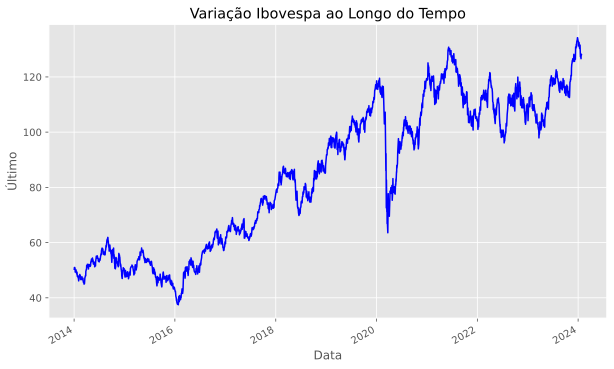

In [ ]:
dados['ultimo'].plot(figsize=(10, 6), linestyle='-', color='b')

# Adicionando r√≥tulos e t√≠tulo ao gr√°fico
plt.title('Varia√ß√£o Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('√öltimo')

# Exibindo o gr√°fico
plt.show()

## Criando um Dataset final

### Excluindo colunas desnecess√°rias

In [ ]:
df_limpo = dados.drop(['abertura', 'maxima', 'minima', 'volume', 'variacao%'], axis=1).copy()
df_limpo.index = pd.DatetimeIndex(df_limpo.index) # transformando em DatetimeIndex para usar seasonal_decompose
df_limpo.head()

ultimo
data              
2024-01-25  128.06
2024-01-24  127.82
2024-01-23  128.26
2024-01-22  126.60
2024-01-19  127.64

In [ ]:
type(df_limpo.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
df_limpo.loc['2024-01-24']

ultimo   127.82
Name: 2024-01-24 00:00:00, dtype: float64

## Decomposi√ß√£o para An√°lise da s√©rie temporal

### Utilizaremos o Statsmodel para decompor a s√©rie em:

* Tend√™ncia, que √© a dire√ß√£o da s√©rie temporal.
* Sazonalidadem, que s√£o os padr√µes repetidos no tempo.
* Ru√≠do, que √© a diferen√ßa entre a s√©rie original e o explicado por tend√™ncia e sazonalidade.


### Import√¢ncia da Decomposi√ß√£o:
A decomposi√ß√£o auxilia na compreens√£o dos dados e na escolha do modelo preditivo, permitindo:

* Previs√µes de longo prazo ao compreender a tend√™ncia.
* Previs√µes de curto prazo ao entender a sazonalidade.
* Melhora nos modelos ao analisar os res√≠duos n√£o capturados.

### S√©rie Aditiva ou Multiplicativa:
A decomposi√ß√£o indica se a s√©rie √©:

* Aditiva: Magnitude de sazonalidade e tend√™ncia constante.
* Multiplicativa: Magnitude varia proporcionalmente ao n√≠vel da s√©rie.

In [ ]:
resultados = seasonal_decompose(df_limpo, model='multiplicative', period=5) # Period = sazonaliade. Como temos dados de segunda a sexta, ent√£o temos 5, referentes aos 5 dias

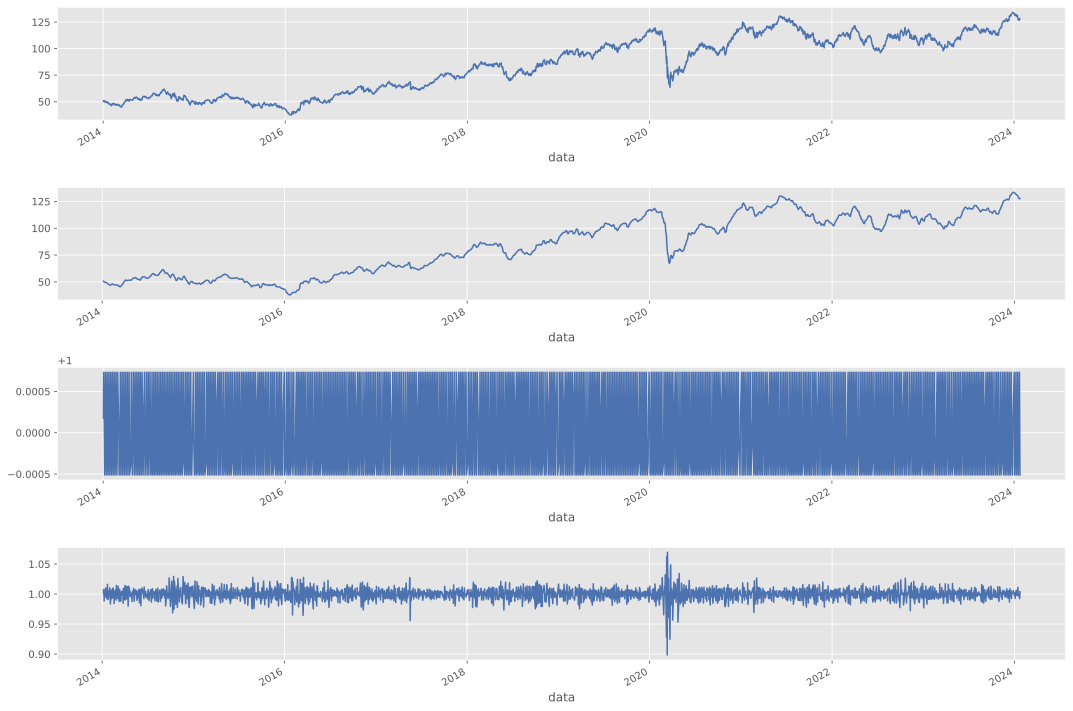

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1) # Serie dos dados
resultados.trend.plot(ax=ax2) # tend√™ncia dos dados
resultados.seasonal.plot(ax=ax3) # sazonalidade
resultados.resid.plot(ax=ax4) # res√≠duos

plt.tight_layout()

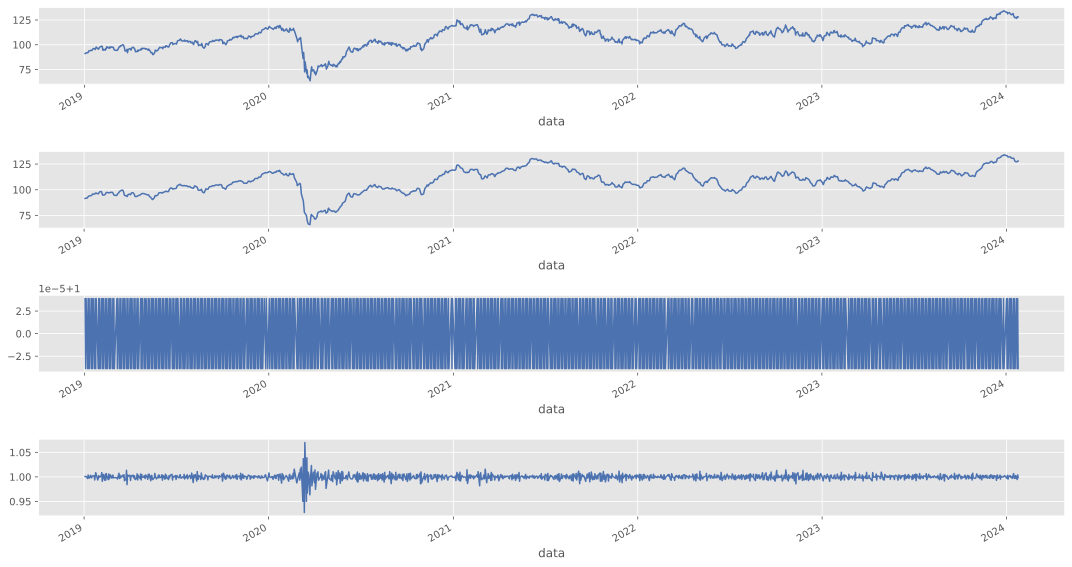

In [ ]:
df_5_anos = df_limpo.loc['2019-01-01':]
seasonplot = seasonal_decompose(df_5_anos, model='multiplicative', period=2)  # decompondo a s√©rie temporal

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
seasonplot.observed.plot(ax=ax1)  # s√©rie real
seasonplot.trend.plot(ax=ax2)  # tend√™ncia
seasonplot.seasonal.plot(ax=ax3)  # sazonalidade
seasonplot.resid.plot(ax=ax4)  # res√≠duos
plt.tight_layout()
plt.show()

## A√ß√µes est√£o subindo?

Se notarmos a 1¬™ decomposi√ß√£o, com todos os 10 anos de dados que temos, podemos assumir, que **SIM**, as a√ß√µes do IBOVESPA est√£o subindo ao longo dos anos.

Por√©m, na segunda decomposi√ß√£o, optei por decompor apenas os √∫ltimos 5 anos de valores do IBOVESPA, e aqui, as coisas ficam um pouco mais interessante, pois podemos perceber que o Ibovespa est√° com pouca varia√ß√£o e isso pode ser atribu√≠do a uma combina√ß√£o de fatores, incluindo:

* Diversifica√ß√£o do √çndice: Como mencionado anteriormente, o Ibovespa √© composto por a√ß√µes de v√°rias empresas de setores diferentes. Isso ajuda a suavizar as flutua√ß√µes, j√° que eventos espec√≠ficos que afetam uma empresa podem ser compensados por desempenhos positivos em outras.

* Resist√™ncia a Choques: A diversifica√ß√£o e a pondera√ß√£o pelo valor de mercado tamb√©m conferem resist√™ncia a choques. Grandes movimentos em uma √∫nica a√ß√£o podem ter um impacto limitado no √≠ndice como um todo.

* Maturidade do Mercado: Mercados mais maduros tendem a ter uma estabilidade maior, pois os investidores est√£o mais informados e as pr√°ticas de investimento s√£o mais desenvolvidas.

* Regula√ß√£o Financeira: A presen√ßa de regulamenta√ß√µes s√≥lidas pode contribuir para a estabilidade do mercado, fornecendo regras e procedimentos que ajudam a prevenir pr√°ticas abusivas e manipula√ß√µes.

* Expectativas dos Investidores: Se os investidores t√™m expectativas de estabilidade de longo prazo, isso pode influenciar seu comportamento, reduzindo a propens√£o a rea√ß√µes exageradas a eventos de curto prazo.

Logo, aqui j√° podemos concluir que, se fiz√©ssemos alguns testes de estacionariedade com os √∫ltimos 5 anos, provavelmente obter√≠amos uma serie estacion√°ria logo de cara. Por isso, optei por trabalhar com os √∫ltimos 10 anos dessa a√ß√£o, pois sei que o IBOVESPA tende a n√£o variar muito, pelos motivos j√° explicados acima, mas que ele varia sim, por√©m demora um pouco mais, ent√£o precis√°vamos de mais anos.

## **Testando Modelos de Machine Learning Cl√°ssicos**

### **M√©dia M√≥vel**

A m√©dia m√≥vel √© uma t√©cnica estat√≠stica utilizada na an√°lise de s√©ries temporais e dados financeiros para suavizar flutua√ß√µes aleat√≥rias e identificar tend√™ncias ao longo do tempo. A ideia b√°sica por tr√°s da m√©dia m√≥vel √© calcular, para cada ponto de dados em uma s√©rie temporal, a m√©dia dos pontos de dados vizinhos.

Vamos utilizar esta t√©cnica para um N de 10 e de 20 dias.

In [ ]:
df_limpo_MA = df_limpo.copy()  # criando uma c√≥pia do DataFrame original

# Adicionando colunas ao DataFrame copiado
df_limpo_MA['MA_window_10'] = df_limpo_MA['ultimo'].rolling(10).mean().shift()  # m√©dia m√≥vel em 10 dias
df_limpo_MA['MA_window_20'] = df_limpo_MA['ultimo'].rolling(20).mean().shift()  # m√©dia m√≥vel em 20 dias


#Rolling para deslocamento. Este par√¢metro especifica o n√∫mero de observa√ß√µes usadas para calcular a estat√≠stica
#shift √© utilizado para deslocar o √≠ndice de DataFrame por um n√∫mero especificado de per√≠odos com uma freq√º√™ncia de tempo

In [ ]:
df_limpo_MA.head(20)

ultimo  MA_window_10  MA_window_20
data                                          
2024-01-25  128.06           NaN           NaN
2024-01-24  127.82           NaN           NaN
2024-01-23  128.26           NaN           NaN
2024-01-22  126.60           NaN           NaN
2024-01-19  127.64           NaN           NaN
2024-01-18  127.32           NaN           NaN
2024-01-17  128.52           NaN           NaN
2024-01-16  129.29           NaN           NaN
2024-01-15  131.52           NaN           NaN
2024-01-12  130.26           NaN           NaN
2024-01-11  130.65        128.53           NaN
2024-01-10  130.84        128.79           NaN
2024-01-09  131.45        129.09           NaN
2024-01-08  132.43        129.41           NaN
2024-01-05  132.02        129.99           NaN
2024-01-04  131.23        130.43           NaN
2024-01-03  132.83        130.82           NaN
2024-01-02  132.70        131.25           NaN
2023-12-28  134.19        131.59           NaN
2023-12-27  134.19        131.86           NaN

### Vizualizando o Resultado

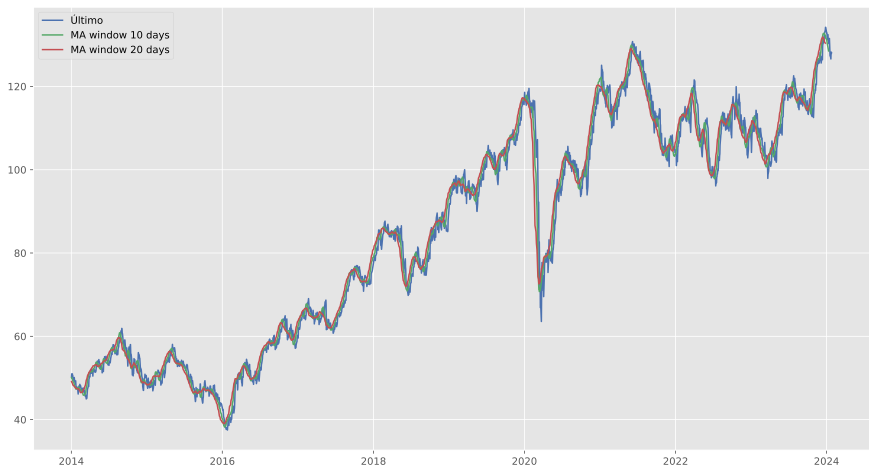

In [ ]:
plt.figure(figsize=(15,8))
plt.grid(True)
plt.plot(df_limpo_MA['ultimo'], label='√öltimo')
plt.plot(df_limpo_MA['MA_window_10'], label='MA window 10 days')
plt.plot(df_limpo_MA['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

### Visualizando os dados mais recentes: √∫ltimos 365 dias

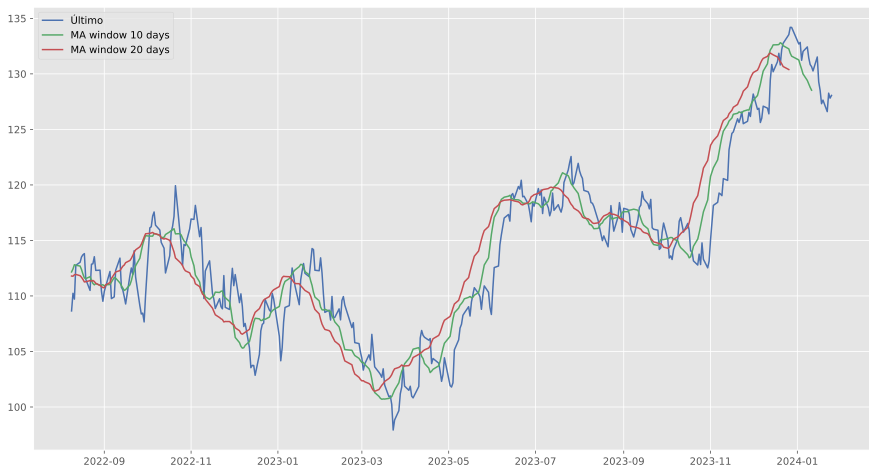

In [ ]:
import matplotlib.pyplot as plt

# Ordenando o DataFrame pela coluna de datas
df_limpo_MA = df_limpo_MA.sort_index(ascending=True)

# Pegando os √∫ltimos 300 dias a partir da data mais recente
df_ultimos_300_dias = df_limpo_MA.tail(365)

plt.figure(figsize=(15, 8))
plt.grid(True)

plt.plot(df_ultimos_300_dias['ultimo'], label='√öltimo')
plt.plot(df_ultimos_300_dias['MA_window_10'], label='MA window 10 days')
plt.plot(df_ultimos_300_dias['MA_window_20'], label='MA window 20 days')
plt.legend(loc=2)
plt.show()

### Prevendo os "N" dias com base na m√©dia m√≥vel aritm√©tica

In [ ]:
df_limpo_MA['MA_window_10_forward_10'] = np.NaN #preechendo com NaN os valores da coluna de MA_window_10_forward_10

In [ ]:
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]  #realizando a janela de tempo

In [ ]:
window_size = 10
forward_days = 10

# Itera√ß√£o sobre a s√©rie temporal com uma janela deslizante
for index in range(window_size, len(df_limpo_MA), forward_days):

    # Itera√ß√£o para calcular a m√©dia m√≥vel ponderada
    for i in range(0, forward_days):
        # Verifica se o √≠ndice atual est√° dentro dos limites da s√©rie temporal
        if index + i >= len(df_limpo_MA):
            break

        # Criando duas janelas:
        # 1. Uma janela para a m√©dia m√≥vel ('window_close')
        # 2. Uma janela para a s√©rie temporal original ('window_MA')
        window_close = make_window(window_size - i, index + i - window_size)
        window_MA = make_window(i, index)

        # Calculando a m√©dia m√≥vel ponderada
        mean = pd.concat([df_limpo_MA['ultimo'].iloc[window_close], df_limpo_MA['MA_window_10_forward_10'].iloc[window_MA]]).mean(axis=0)

        # Atualizando o DataFrame com a m√©dia m√≥vel ponderada
        df_limpo_MA.iat[index + i, df_limpo_MA.columns.get_loc('MA_window_10_forward_10')] = mean

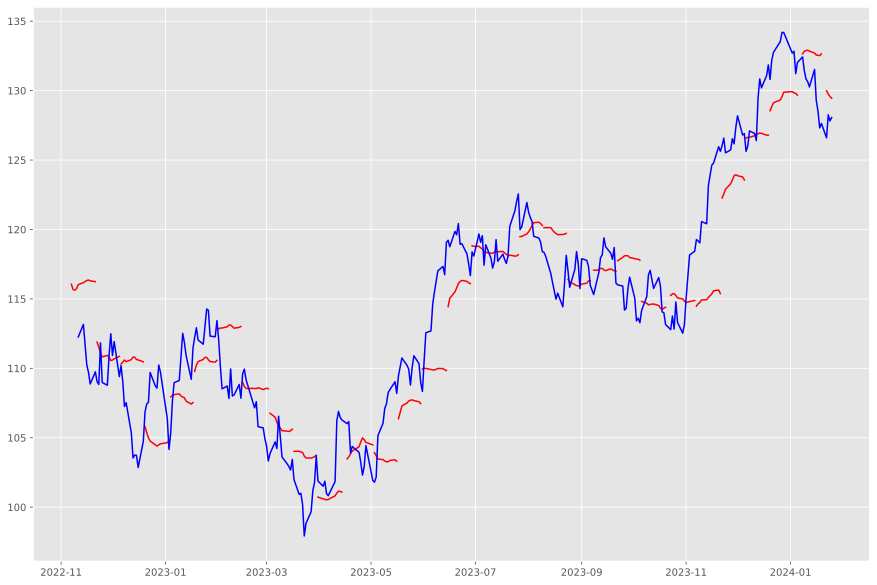

In [ ]:
limit = 300

plt.figure(figsize = (15,10))

size = len(df_limpo_MA)-limit - (len(df_limpo_MA)-limit)%forward_days

for index in range(size, len(df_limpo_MA), forward_days):
    plt.plot(df_limpo_MA['MA_window_10_forward_10'][index:index+forward_days], color='r')

plt.plot(df_limpo_MA['ultimo'][-limit:], color='b', label='Close')
#plt.legend(loc='best')
plt.show()

Cada reta vermelha representa uma previs√£o de 10 dias, tomando como base os 10 dias anteriores. Por isso elas s√£o descont√≠nuas.

Apesar de ser um modelo mais cl√°ssico, ele √© bem simples, pois tem como objetivo prever N dias a frente para ver qual ser√° o comportamento da a√ß√£o.

Como vimos aqui, essa metodologia n√£o deu certo, ent√£o vamos testar o outro Cl√°ssico, o ARIMA.

## Testando o modelo ARIMA üíπ
ARIMA significa M√©dia M√≥vel Integrada Auto-Regressiva.

Um modelo ARIMA √© uma classe de modelos estat√≠sticos para analisar e prever dados de s√©ries temporais. Enquanto os modelos de suaviza√ß√£o exponencial s√£o baseados na descri√ß√£o da tend√™ncia e sazonalidade dos dados, os modelos ARIMA visam descrever as autocorrela√ß√µes nos dados.

O algoritmo ARIMA utiliza autoregress√£o + m√©dias m√≥veis + diferencia√ß√£o.

Os termos autoregressivos permitem que o modelo capture a influ√™ncia dos valores passados na s√©rie temporal. Os termos de m√©dia m√≥vel permitem que o modelo capture os erros de previs√£o passados. A diferencia√ß√£o permite que o modelo capture tend√™ncias na s√©rie temporal.

‚ùó Antes de falarmos sobre o modelo ARIMA, vamos falar sobre o conceito de estacionariedade e a t√©cnica de diferencia√ß√£o de s√©ries temporais.

O que √© estacionaridade? ü§î

Para trabalhar com s√©ries temporais utilizando o modelo ARIMA, precisamos que ela seja estacion√°ria. Essa caracter√≠stica al√©m de ser necess√°ria para algum modelos, facilita a proje√ß√£o dos dados. Portanto √© considerado uma s√©rie estacionaria aquela s√©rie que em *certos per√≠odos possui a mesma m√©dia*.

A tend√™ncia e a sazonalidade afetar√£o o valor da s√©rie temporal em momentos diferentes. Por outro lado, para a estacionaridade, n√£o importa quando voc√™ a observa, ela deve parecer a mesma em qualquer momento. Em geral, uma s√©rie temporal estacion√°ria n√£o ter√° padr√µes previs√≠veis no longo prazo.

Hiperpar√¢metros do algortimo:
P - N√∫mero de lags que devem ser inclu√≠dos no modelo (lags s√£o valores auto correlacionados que devem ser levados em considera√ß√£o, ou seja, os valores hist√≥ricos que ser√£o utilizados para prever o futuro.)
D - N√∫mero de vezes que as observa√ß√µes ser√£o diferenciadas. (tornar a s√©rie estacion√°ria)
Q - Ordem de m√©dia m√≥vel, tamanho de uma janela (lag) de m√©dia m√≥vel.(para calcular o erro e encontrar a melhor previs√£o (tamanho da janela da media m√≥vel) para calcular os residuos e fazer o forecast).
Passos para aplicar o ARIMA:
Visualize os dados da s√©rie temporal üìà
Identifique se a data √© estacion√°ria ‚úÖ
Plote os gr√°ficos de correla√ß√£o e autocorrela√ß√£o ü§î
Construir o modelo ARIMA com base nos dados üî®
Analisando a correla√ß√£o dos dados:
Ao trabalhar com modelos ARIMA, uma etapa importante √© entender a autocorrela√ß√£o presente nos dados. A autocorrela√ß√£o refere-se √† correla√ß√£o de uma s√©rie temporal com uma vers√£o atrasada de si mesma. Para entender e visualizar essa autocorrela√ß√£o, utilizamos as fun√ß√µes de autocorrela√ß√£o (ACF) e autocorrela√ß√£o parcial (PACF).

Autocorrela√ß√£o e Autocorrela√ß√£o parcial:
ACF (autocorrela√ß√£o) temos a correla√ß√£o direta e indireta.
PACF (autocorrela√ß√£o parcial): apenas a correla√ß√£o direta.
A ACF √© uma ferramenta valiosa para entender padr√µes de depend√™ncia temporal nos dados. Os lags s√£o os intervalos de atraso entre as observa√ß√µes. Cada ponto no gr√°fico indica a correla√ß√£o entre a s√©rie temporal e ela mesma em diferentes pontos no passado.

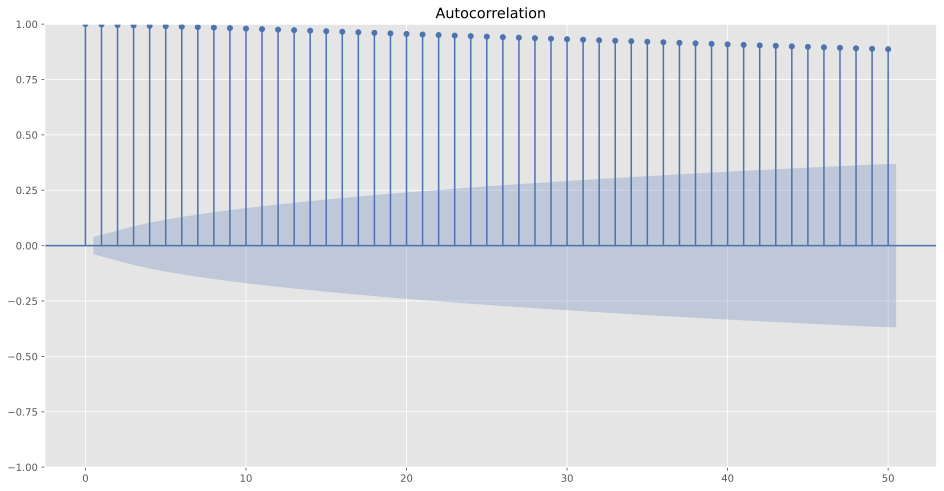

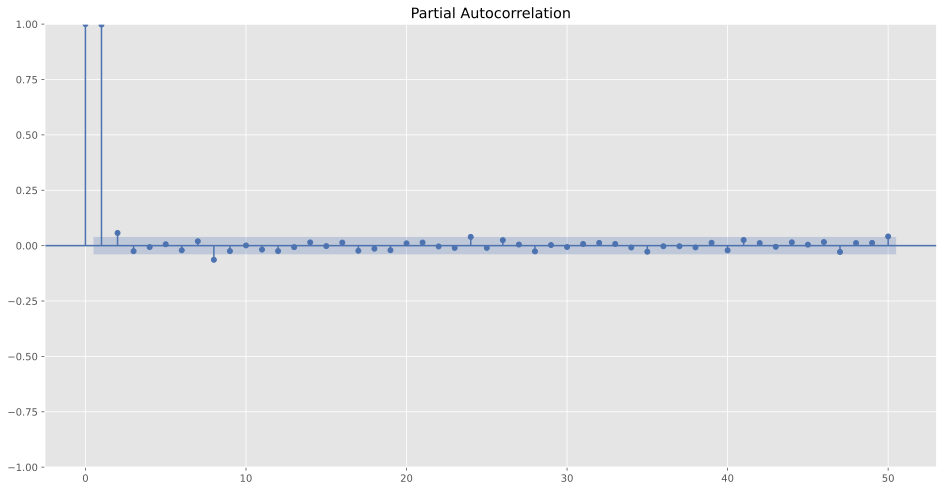

In [ ]:
# Plotando a ACF
plot_acf(df_limpo['ultimo'], lags=50)

# Plotando a PACF
plot_pacf(df_limpo['ultimo'], lags=50)

plt.show()

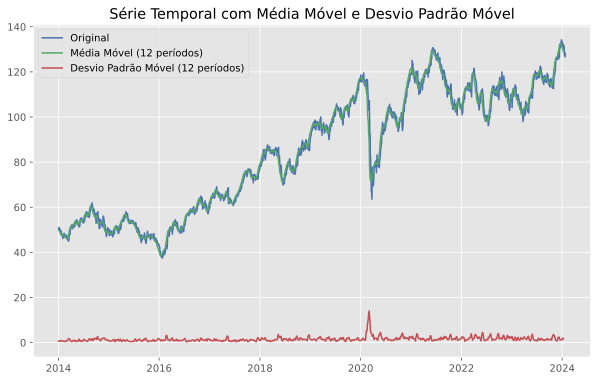

In [ ]:
window_size = 12  # ajuste conforme necess√°rio

# Calculando a m√©dia m√≥vel e o desvio padr√£o
rolling_mean = df_limpo['ultimo'].rolling(window=window_size).mean()
rolling_std = df_limpo['ultimo'].rolling(window=window_size).std()

# Plotando a s√©rie temporal original, m√©dia m√≥vel e desvio padr√£o
plt.figure(figsize=(10, 6))
plt.plot(df_limpo['ultimo'], label='Original')
plt.plot(rolling_mean, label=f'M√©dia M√≥vel ({window_size} per√≠odos)')
plt.plot(rolling_std, label=f'Desvio Padr√£o M√≥vel ({window_size} per√≠odos)')

plt.title('S√©rie Temporal com M√©dia M√≥vel e Desvio Padr√£o M√≥vel')
plt.legend()
plt.show()


In [ ]:
# Fun√ß√£o para realizar o Teste de Dickey-Fuller e imprimir os resultados
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')

    print('Resultado do Teste de Dickey-Fuller:')
    print('Estat√≠stica do Teste:', result[0])
    print('Valor p:', result[1])
    print('Valores Cr√≠ticos:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

    # Tomar uma decis√£o com base no valor p
    if result[1] <= 0.05:
        print("\nResultado: A s√©rie √© estacion√°ria.")
    else:
        print("\nResultado: A s√©rie n√£o √© estacion√°ria.")

# Aplicar o Teste de Dickey-Fuller na s√©rie temporal original
adf_test(df_limpo['ultimo'].dropna())

Resultado do Teste de Dickey-Fuller:
Estat√≠stica do Teste: -1.4764166723788021
Valor p: 0.5451437523440054
Valores Cr√≠ticos:
   1%: -3.4329831717881003
   5%: -2.8627033184297384
   10%: -2.5673892799386944

Resultado: A s√©rie n√£o √© estacion√°ria.


### Transformando em estacionairia

In [ ]:
df_limpo.head()

ultimo
data              
2024-01-25  128.06
2024-01-24  127.82
2024-01-23  128.26
2024-01-22  126.60
2024-01-19  127.64

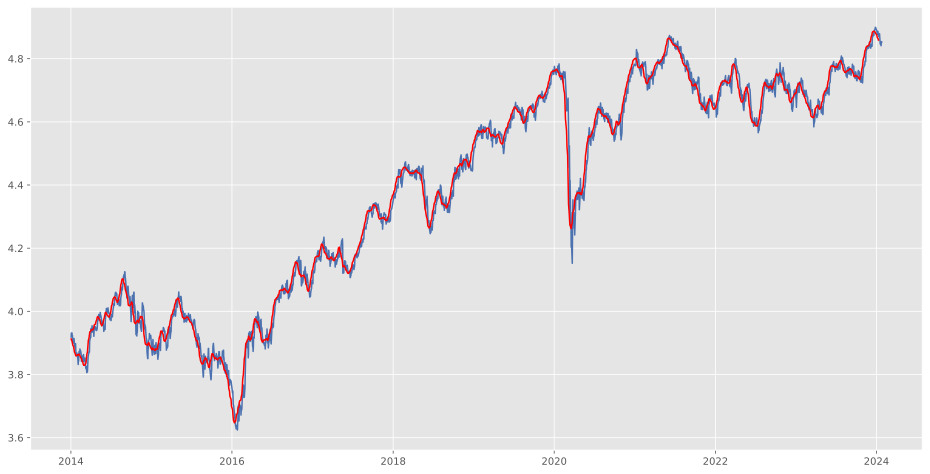

In [ ]:
#Estimating trend
df_limpo_log = np.log(df_limpo) #Transforma√ß√£o logar√≠tma

# Calculando a m√©dia m√≥vel
ma = df_limpo_log.rolling(window=12).mean()
mstd = df_limpo_log.rolling(window=12).std()

# Plotando
plt.plot(df_limpo_log)
plt.plot(ma, color='red')

In [ ]:
df_limpo_log_minus_ma = df_limpo_log - ma
df_limpo_log_minus_ma.head(12)

#Remove NAN values
df_limpo_log_minus_ma.dropna(inplace=True)

In [ ]:
# Fun√ß√£o para testar a estacionariedade da s√©rie transformada

def test_stationarity(timeseries):

    #Determinar estat√≠sticas cont√≠nuas
    ma = timeseries.rolling(window=12).mean()
    mstd = timeseries.rolling(window=12).std()

    #Plot estat√≠sticas cont√≠nuas
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(ma, color='red', label='Rolling Mean')
    std = plt.plot(mstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Performance do Dickey‚ÄìFuller:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['ultimo'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

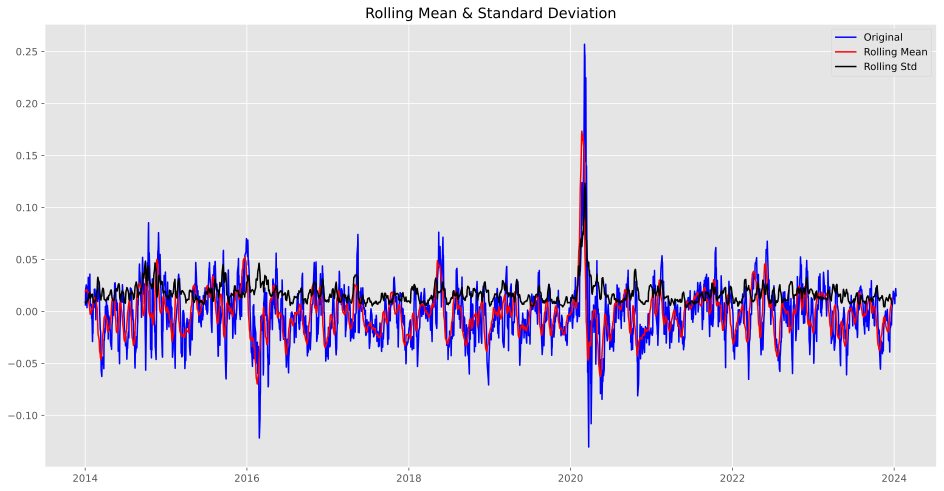

Results of Dickey Fuller Test:
Test Statistic                  -12.84
p-value                           0.00
#Lags Used                        7.00
Number of Observations Used   2,475.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
test_stationarity(df_limpo_log_minus_ma)

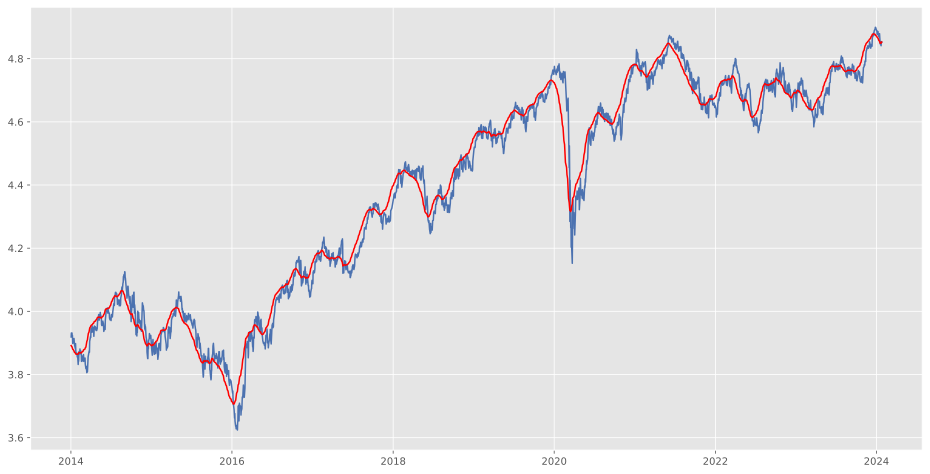

In [ ]:
df_limpo_log_exponential_decay = df_limpo_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_limpo_log)
plt.plot(df_limpo_log_exponential_decay, color='red')

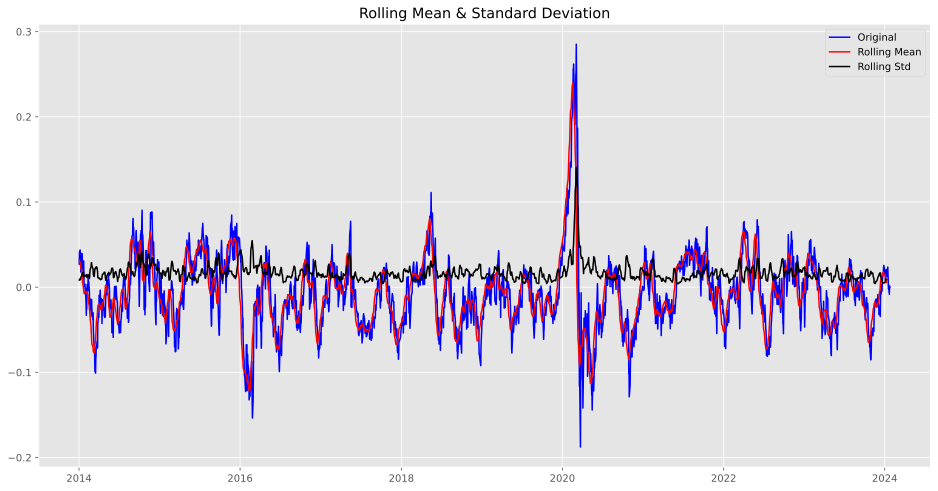

Results of Dickey Fuller Test:
Test Statistic                   -7.52
p-value                           0.00
#Lags Used                        7.00
Number of Observations Used   2,486.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
# Subtraindo o dataset em escala logar√≠tma pelo decaimento exponencial
df_limpo_log_minus_df_limpo_log_exponential_decay = df_limpo_log - df_limpo_log_exponential_decay
test_stationarity(df_limpo_log_minus_df_limpo_log_exponential_decay)

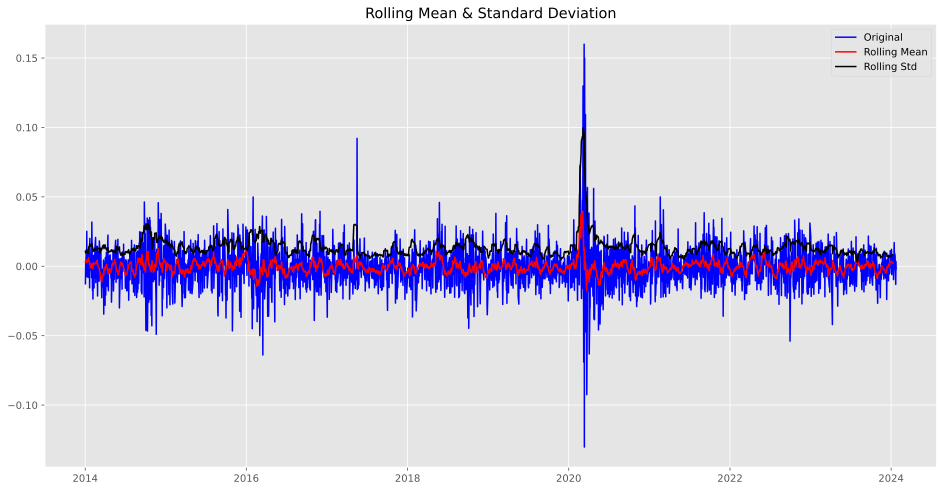

Results of Dickey Fuller Test:
Test Statistic                  -18.07
p-value                           0.00
#Lags Used                        6.00
Number of Observations Used   2,486.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
df_limpo_log_minus_DiffShifting = df_limpo_log - df_limpo_log.shift() #diferen√ßa entre o valor anterior e o atual
df_limpo_log_minus_DiffShifting.dropna(inplace=True)
test_stationarity(df_limpo_log_minus_DiffShifting)

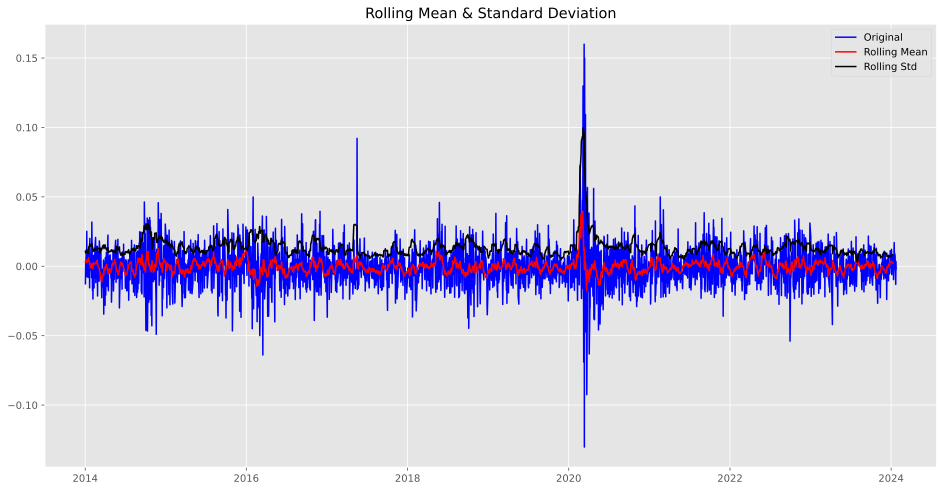

Results of Dickey Fuller Test:
Test Statistic                  -18.07
p-value                           0.00
#Lags Used                        6.00
Number of Observations Used   2,486.00
Critical Value (1%)              -3.43
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


In [ ]:
df_limpo_log_minus_DiffShifting.dropna(inplace=True)
test_stationarity(df_limpo_log_minus_DiffShifting)

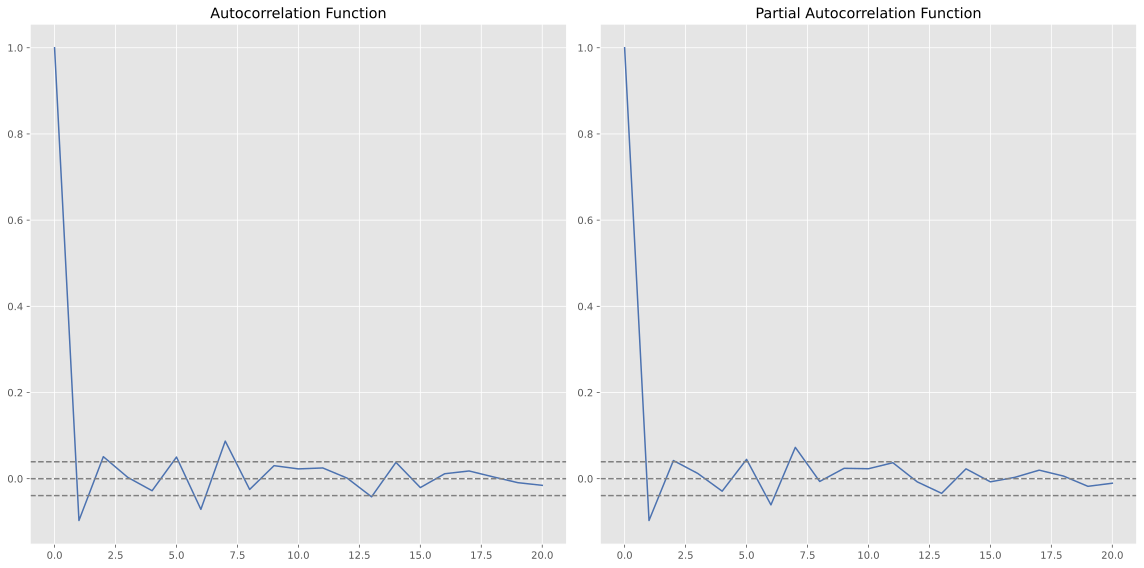

In [ ]:
lag_acf = acf(df_limpo_log_minus_DiffShifting, nlags=20)
lag_pacf = pacf(df_limpo_log_minus_DiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_limpo_log_minus_DiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_limpo_log_minus_DiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_limpo_log_minus_DiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_limpo_log_minus_DiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

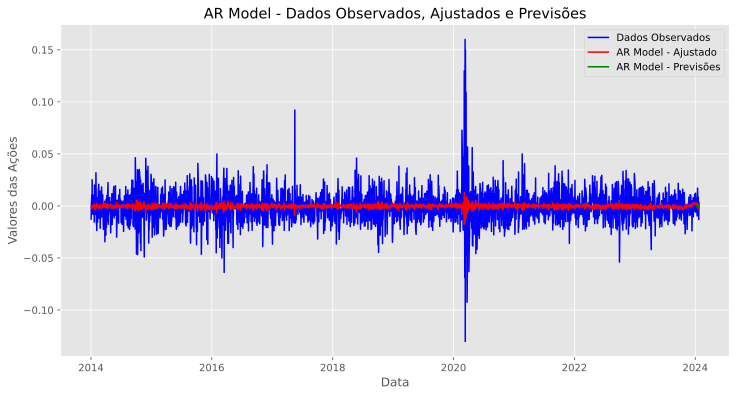

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Configura√ß√£o do modelo ARIMA
p = 2
d = 1
q = 2

# Ajuste do modelo ARIMA
model = ARIMA(df_limpo_log_minus_DiffShifting['ultimo'], order=(p, d, q))
results_AR = model.fit()

# Previs√µes
forecast_steps = 10  # Ajuste conforme necess√°rio
forecast = results_AR.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df_limpo_log_minus_DiffShifting.index.max(), periods=forecast_steps + 1, freq=df_limpo_log_minus_DiffShifting.index.to_series().diff().mean())

# Plotagem dos resultados
plt.figure(figsize=(12, 6))
plt.plot(df_limpo_log_minus_DiffShifting.index, df_limpo_log_minus_DiffShifting['ultimo'], color="blue", label='Dados Observados')
plt.plot(df_limpo_log_minus_DiffShifting.index, results_AR.fittedvalues, color='red', label='AR Model - Ajustado')
plt.plot(forecast_index[1:], forecast.predicted_mean, color='green', label='AR Model - Previs√µes')
plt.title('AR Model - Dados Observados, Ajustados e Previs√µes')
plt.xlabel('Data')
plt.ylabel('Valores das A√ß√µes')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Obtenha as previs√µes
predictions = results_AR.fittedvalues

# Ajuste os √≠ndices para garantir correspond√™ncia
predictions.index = df_limpo_log_minus_DiffShifting.index

# np.cumsum(predictions) √© usado para calcular a soma cumulativa das previs√µes.
predicted_values = df_limpo_log_minus_DiffShifting['ultimo'].iloc[0] + np.cumsum(predictions)

# Calcule o MAPE
mape = mean_absolute_error(df_limpo_log_minus_DiffShifting['ultimo'], predicted_values) * 100

print(f"MAPE: {mape:.2f}%")

MAPE: 50.49%


# prophet pro

Testando o modelo com prophet üîÆ
O prophet √© uma ferramenta de previs√£o para s√©ries temporais desenvolvida pelo Facebook. O Prophet √© especialmente projetado para lidar com s√©ries temporais que possuem padr√µes sazonais fortes e v√°rios pontos de mudan√ßa.

O Prophet √© um vidente, capaz de entender e prever tend√™ncias, sazonalidades e feriados.üîÆ M√°gico n√©?

O Prophet se destaca em sua capacidade de lidar com dados faltantes, tend√™ncias que mudam ao longo do tempo e at√© mesmo feriados! Ele foi projetado para ser flex√≠vel e intuitivo, tornando a previs√£o de s√©ries temporais uma tarefa mais simples, mesmo para aqueles que n√£o s√£o especialistas em estat√≠stica.

In [ ]:
# Use a fun√ß√£o download para obter os dados
df = df_limpo.copy()
df['ds'] = df.index
df['y'] = df['ultimo']
df = df[['ds', 'y']].reset_index(drop=True)
df.head()

ds      y
0 2024-01-25 128.06
1 2024-01-24 127.82
2 2024-01-23 128.26
3 2024-01-22 126.60
4 2024-01-19 127.64

Seprando os dados em treino e teste

In [ ]:
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (1995, 2)
testing data size : (499, 2)


In [ ]:
modelo = Prophet(daily_seasonality=True)
modelo.fit(train_data)
dataFramefuture = modelo.make_future_dataframe(periods=30, freq='D')
previsao = modelo.predict(dataFramefuture)
previsao.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/wkgsl19r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/dbmqm24t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31058', 'data', 'file=/tmp/tmpnaqv5cn0/wkgsl19r.json', 'init=/tmp/tmpnaqv5cn0/dbmqm24t.json', 'output', 'file=/tmp/tmpnaqv5cn0/prophet_modelkut6cu9w/prophet_model-20240127220503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2014-01-02  49.63       41.93       58.04        49.63        49.63   
1 2014-01-03  49.66       43.87       58.68        49.66        49.66   
2 2014-01-06  49.74       43.20       58.60        49.74        49.74   
3 2014-01-08  49.80       44.02       58.92        49.80        49.80   
4 2014-01-09  49.83       43.33       58.16        49.83        49.83   

   additive_terms  additive_terms_lower  additive_terms_upper  daily  ...  \
0            0.30                  0.30                  0.30  -1.00  ...   
1            0.84                  0.84                  0.84  -1.00  ...   
2            1.16                  1.16                  1.16  -1.00  ...   
3            1.42                  1.42                  1.42  -1.00  ...   
4            1.18                  1.18                  1.18  -1.00  ...   

   weekly  weekly_lower  weekly_upper  yearly  yearly_lower  yearly_upper  \
0   -0.36         -0.36         -0.36    1.66          1.66          1.66   
1    0.03          0.03          0.03    1.81          1.81          1.81   
2   -0.05         -0.05         -0.05    2.22          2.22          2.22   
3   -0.02         -0.02         -0.02    2.45          2.45          2.45   
4   -0.36         -0.36         -0.36    2.54          2.54          2.54   

   multiplicative_terms  multiplicative_terms_lower  \
0                  0.00                        0.00   
1                  0.00                        0.00   
2                  0.00                        0.00   
3                  0.00                        0.00   
4                  0.00                        0.00   

   multiplicative_terms_upper  yhat  
0                        0.00 49.93  
1                        0.00 50.50  
2                        0.00 50.91  
3                        0.00 51.22  
4                        0.00 51.01  

[5 rows x 22 columns]

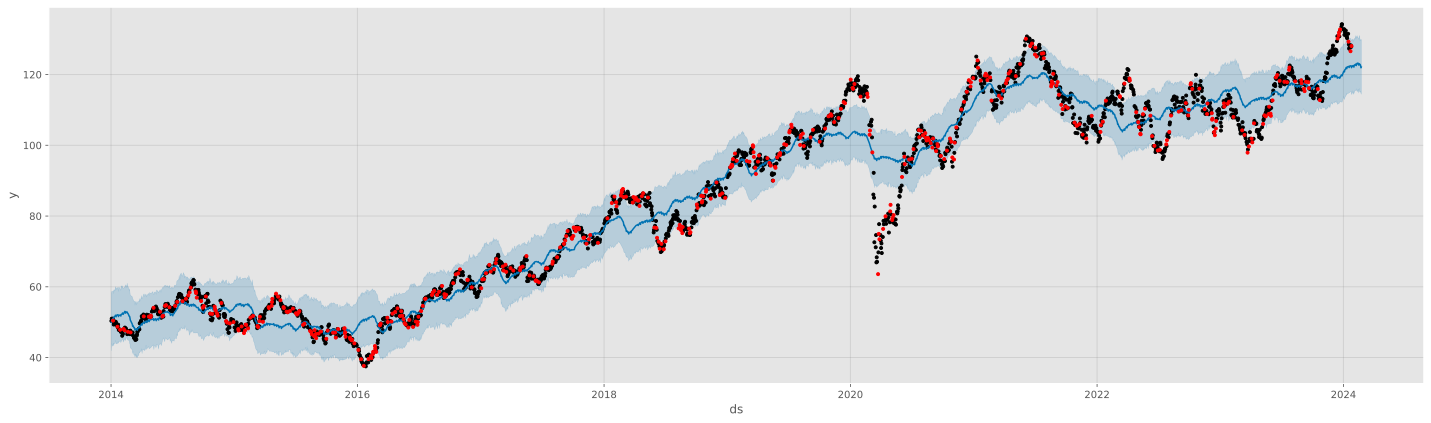

In [ ]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(test_data['ds'], test_data['y'], '.r')

In [ ]:
import plotly.graph_objects as go

# Criar uma figura para o gr√°fico
fig = go.Figure()

# Adicionar a s√©rie temporal prevista ao gr√°fico
fig.add_trace(go.Scatter(x=previsao['ds'], y=previsao['yhat'], mode='lines', name='Previs√£o'))

# Adicionar os pontos de teste ao gr√°fico
fig.add_trace(go.Scatter(x=test_data['ds'], y=test_data['y'], mode='markers', marker=dict(color='red'), name='Dados de Teste'))

# Layout do gr√°fico
fig.update_layout(title='Previs√£o do Modelo',
                  xaxis_title='Data',
                  yaxis_title='Valor',
                  showlegend=True,
                  xaxis=dict(rangeslider=dict(visible=True), type='date'))

# Exibir o gr√°fico
fig.show()


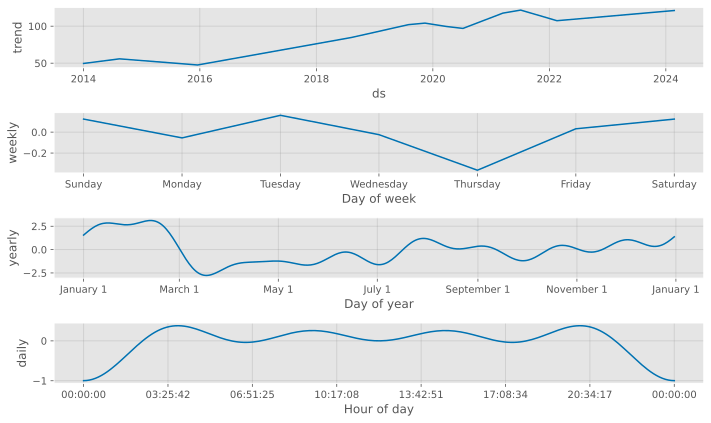

In [ ]:
modelo.plot_components(previsao, figsize=(10,6));

Adicionando Changepoints no modelo

O prophet permite adicionar pontos de mudan√ßas na s√©rie temporal, o que nos permite identificar em quais datas ocorrem poss√≠veis mudan√ßas.

In [ ]:
from prophet.plot import add_changepoints_to_plot

modelo_changepoints = Prophet(n_changepoints=5)
modelo_changepoints.fit(train_data)
dataFramefuture = modelo_changepoints.make_future_dataframe(periods=30, freq='D')
previsao_changepoints = modelo_changepoints.predict(dataFramefuture)
previsao_changepoints.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/6xp_ofua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/d9vogmmj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=466', 'data', 'file=/tmp/tmpnaqv5cn0/6xp_ofua.json', 'init=/tmp/tmpnaqv5cn0/d9vogmmj.json', 'output', 'file=/tmp/tmpnaqv5cn0/prophet_modelj3u_mm2h/prophet_model-20240127220506.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2014-01-02  53.07       44.18       63.79        53.07        53.07   
1 2014-01-03  53.06       45.52       64.52        53.06        53.06   
2 2014-01-06  53.03       45.71       65.12        53.03        53.03   
3 2014-01-08  53.01       44.87       65.08        53.01        53.01   
4 2014-01-09  53.00       45.62       65.29        53.00        53.00   

   additive_terms  additive_terms_lower  additive_terms_upper  weekly  \
0            1.38                  1.38                  1.38    0.16   
1            1.97                  1.97                  1.97    0.61   
2            2.34                  2.34                  2.34    0.59   
3            2.62                  2.62                  2.62    0.65   
4            2.23                  2.23                  2.23    0.16   

   weekly_lower  weekly_upper  yearly  yearly_lower  yearly_upper  \
0          0.16          0.16    1.22          1.22          1.22   
1          0.61          0.61    1.35          1.35          1.35   
2          0.59          0.59    1.75          1.75          1.75   
3          0.65          0.65    1.98          1.98          1.98   
4          0.16          0.16    2.07          2.07          2.07   

   multiplicative_terms  multiplicative_terms_lower  \
0                  0.00                        0.00   
1                  0.00                        0.00   
2                  0.00                        0.00   
3                  0.00                        0.00   
4                  0.00                        0.00   

   multiplicative_terms_upper  yhat  
0                        0.00 54.45  
1                        0.00 55.03  
2                        0.00 55.37  
3                        0.00 55.63  
4                        0.00 55.23

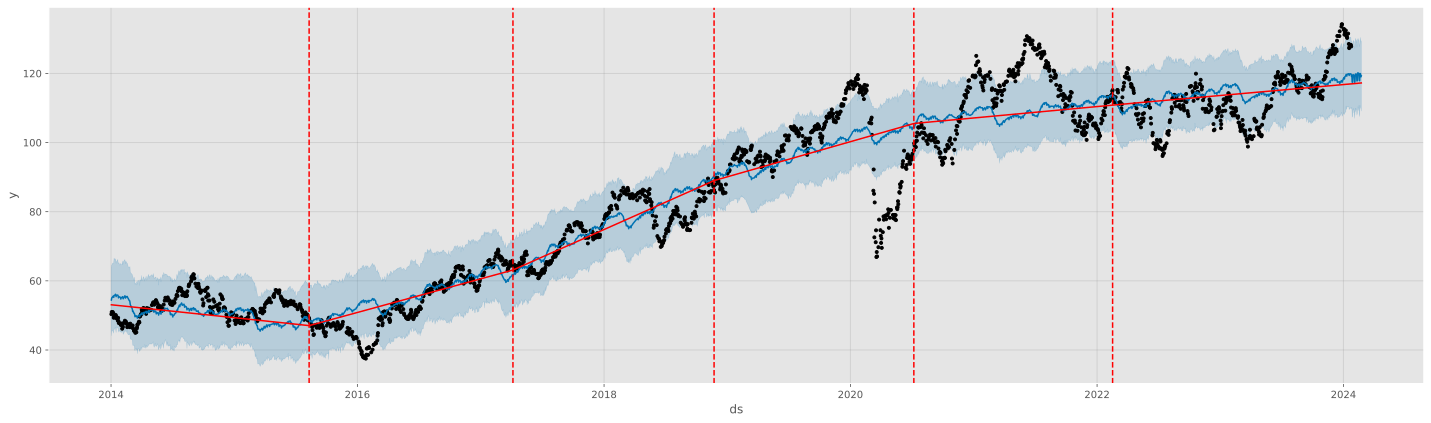

In [ ]:
fig = modelo_changepoints.plot(previsao_changepoints, figsize=(20,6));
a = add_changepoints_to_plot(fig.gca(), modelo_changepoints, previsao_changepoints)

In [ ]:
# Extrair as colunas relevantes dos DataFrames
previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = train_data[valores_reais_cols]

# Mesclar os DataFrames nas colunas 'ds' para comparar previs√µes e valores reais
resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

# Calcular o erro percentual absoluto para cada ponto de dados
resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100

# Calcular o MAPE
mape = np.mean(resultados['erro_percentual_absoluto'])

print(f"MAPE: {mape:.2f}%")

MAPE: 5.39%


Cross validation
Para concluir o modelo do Prophet, tentei fazer a valida√ß√£o cruzada para testar dados que nunca foram vistos pelo modelo antes.

Observe que no resultado da valida√ß√£o cruzada temos os valores de yhat, yhat_lower, yhat_upper e o ponto de corte. O objetivo da valida√ß√£o cruzada √© medir o erro de predi√ß√£o, selecionando assim pontos de corte e para cada um desses pontos o modelo √© ajustado utilizando dados apenas at√© aquele ponto de corte.

In [ ]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(modelo, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 15 forecasts with cutoffs between 2016-03-01 00:00:00 and 2023-01-24 00:00:00


  0%|          | 0/15 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/tl07wax1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/xxpl8s9w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52645', 'data', 'file=/tmp/tmpnaqv5cn0/tl07wax1.json', 'init=/tmp/tmpnaqv5cn0/xxpl8s9w.json', 'output', 'file=/tmp/tmpnaqv5cn0/prophet_modelbumfndzz/prophet_model-20240127220508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/y6k530k4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnaqv5cn0/0e3odypd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv['cutoff'].unique()

array(['2016-03-01T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2017-02-24T00:00:00.000000000', '2017-08-23T00:00:00.000000000',
       '2018-02-19T00:00:00.000000000', '2018-08-18T00:00:00.000000000',
       '2019-02-14T00:00:00.000000000', '2019-08-13T00:00:00.000000000',
       '2020-02-09T00:00:00.000000000', '2020-08-07T00:00:00.000000000',
       '2021-02-03T00:00:00.000000000', '2021-08-02T00:00:00.000000000',
       '2022-01-29T00:00:00.000000000', '2022-07-28T00:00:00.000000000',
       '2023-01-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon    mse  rmse   mae  mape  mdape  smape  coverage
0    37 days  74.34  8.62  5.93  0.07   0.05   0.07      0.43
1    38 days  83.57  9.14  6.10  0.07   0.05   0.07      0.44
2    39 days  92.13  9.60  6.28  0.08   0.05   0.07      0.43
3    40 days 101.71 10.09  6.48  0.08   0.05   0.08      0.43
4    41 days 101.87 10.09  6.47  0.08   0.05   0.08      0.43
..       ...    ...   ...   ...   ...    ...    ...       ...
324 361 days 417.71 20.44 17.62  0.17   0.16   0.18      0.45
325 362 days 412.86 20.32 17.51  0.17   0.15   0.18      0.45
326 363 days 412.85 20.32 17.52  0.17   0.15   0.18      0.46
327 364 days 417.79 20.44 17.62  0.17   0.16   0.18      0.46
328 365 days 416.31 20.40 17.59  0.17   0.16   0.17      0.47

[329 rows x 8 columns]

In [ ]:
import pandas as pd

# Gerar datas para os pr√≥ximos 90 dias
data_futuro = pd.date_range(start=df['ds'].max(), periods=90, freq='D')[1:]
data_futuro = pd.DataFrame(data_futuro, columns=['ds'])

# Fazer previs√µes para os pr√≥ximos 90 dias
previsao_futuro = modelo.predict(data_futuro)

# Selecionar as colunas relevantes
tabela_previsao = previsao_futuro[['ds', 'yhat']].rename(columns={'yhat': 'previsao'})

# Exibir a tabela
print(tabela_previsao)

           ds  previsao
0  2024-01-26    122.35
1  2024-01-27    122.45
2  2024-01-28    122.46
3  2024-01-29    122.31
4  2024-01-30    122.55
..        ...       ...
84 2024-04-19    119.94
85 2024-04-20    120.06
86 2024-04-21    120.09
87 2024-04-22    119.94
88 2024-04-23    120.18

[89 rows x 2 columns]


In [ ]:
# Configurar o pandas para exibir todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exibir a tabela de previs√£o
print(tabela_previsao)

# Restaurar as op√ß√µes padr√£o do pandas ap√≥s a exibi√ß√£o
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


           ds  previsao
0  2024-01-26    122.35
1  2024-01-27    122.45
2  2024-01-28    122.46
3  2024-01-29    122.31
4  2024-01-30    122.55
5  2024-01-31    122.40
6  2024-02-01    122.11
7  2024-02-02    122.56
8  2024-02-03    122.71
9  2024-02-04    122.77
10 2024-02-05    122.66
11 2024-02-06    122.94
12 2024-02-07    122.82
13 2024-02-08    122.54
14 2024-02-09    123.00
15 2024-02-10    123.14
16 2024-02-11    123.18
17 2024-02-12    123.02
18 2024-02-13    123.25
19 2024-02-14    123.06
20 2024-02-15    122.70
21 2024-02-16    123.05
22 2024-02-17    123.07
23 2024-02-18    122.99
24 2024-02-19    122.70
25 2024-02-20    122.78
26 2024-02-21    122.44
27 2024-02-22    121.92
28 2024-02-23    122.12
29 2024-02-24    122.00
30 2024-02-25    121.77
31 2024-02-26    121.35
32 2024-02-27    121.31
33 2024-02-28    120.86
34 2024-02-29    120.25
35 2024-03-01    120.38
36 2024-03-02    120.20
37 2024-03-03    119.93
38 2024-03-04    119.50
39 2024-03-05    119.47
40 2024-03-06   